# Turtle Soup

ДЛЯ ПОКУПКИ (ДЛЯ ПРОДАЖИ - НАОБОРОТ)
<ol>
<li>Сегодня должен быть сделан новый 20-дневный минимум — чем ниже, тем лучше.</li>
<li>Предыдущий 20-дневный минимум должен произойти по крайней мере на четыре
торговые сессии ранее. Это очень важно.</li>
<li>После того, как рынок упадет ниже <font color='#111a2e' style="background-color:#f7e98f;">предыдущего</font> 20-дневного минимума, разместите для
целей входа покупающий стоп на 5—10 тиков выше предыдущего 20-дневного минимума.
Этот покупающий стоп годится только на сегодня.</li>
<li>Если покупающий стоп исполняется, немедленно ставьте первоначальный действующий-
до-отмены продающий стоп-лосс на один тик ниже сегодняшнего минимума.</li>
<li>Когда позиция становится прибыльной, используйте плавающий стоп, чтобы
предотвратить потерю прибыли. Некоторые из этих сделок будут длиться два-три часа, а
некоторые — несколько дней. Из-за волатильности и шума 20-дневных максимумов и
минимумов каждый рынок ведет себя по-своему.</li>
<li>Правило повторного входа: если на первый или второй день существования сделки у
вас сработал стоп, вы можете войти повторно с помощью покупающего стопа на
первоначальном уровне входа (только на первый или на второй день). Это должно
несколько увеличить вашу прибыль.</li>
</ol>

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

from jupyterthemes import jtplot
jtplot.style(theme='onedork', figsize=(15, 9))

In [2]:
spy_df = pd.read_csv('../../../data/SPY_2002-01-01_2022-12-31_1d.csv', index_col=0, parse_dates=True)
spy_df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2022-12-23,378.206578,381.603617,376.592742,381.454193,59857300,0.0,0.0,0.0
2022-12-27,381.334651,381.693267,378.206574,379.949921,51638200,0.0,0.0,0.0
2022-12-28,379.880163,381.932359,374.988858,375.227936,70911500,0.0,0.0,0.0
2022-12-29,378.186666,382.888722,377.638738,381.982178,66970900,0.0,0.0,0.0
2022-12-30,379.192810,381.125406,376.991191,380.975983,84022200,0.0,0.0,0.0


In [3]:
spy_close = spy_df['Close'].to_frame()
spy_close

,Close
Date,
2002-01-02,77.189713
2002-01-03,78.064987
2002-01-04,78.586159
2002-01-07,78.031601
2002-01-08,77.851181
...,...
2022-12-23,381.454193
2022-12-27,379.949921
2022-12-28,375.227936


In [4]:
spy_close['20d_min'] = spy_close['Close'].rolling(window=20).min()
spy_close['20d_max'] = spy_close['Close'].rolling(window=20).max()
spy_close.dropna(inplace=True)
spy_close

,Close,20d_min,20d_max
Date,,,
2002-01-30,74.744324,73.681999,78.586159
2002-01-31,75.619598,73.681999,78.586159
2002-02-01,75.265503,73.681999,78.586159
2002-02-04,73.394707,73.394707,78.031601
2002-02-05,72.940392,72.940392,77.851181
...,...,...,...
2022-12-23,381.454193,378.575165,404.273560
2022-12-27,379.949921,378.575165,404.273560
2022-12-28,375.227936,375.227936,404.273560


In [5]:
t_points_max = spy_close[spy_close['Close'] == spy_close['20d_max']]
t_points_max

,Close,20d_min,20d_max
Date,,,
2002-03-01,75.993744,72.172012,75.993744
2002-03-04,77.336731,72.172012,77.336731
2002-03-06,78.004852,72.172012,78.004852
2002-03-08,78.165215,72.359131,78.165215
2002-03-11,78.332237,72.359131,78.332237
...,...,...,...
2022-11-10,391.392120,354.641785,391.392120
2022-11-11,395.180206,362.356781,395.180206
2022-11-22,396.558594,367.909973,396.558594


In [6]:
t_points_min = spy_close[spy_close['Close'] == spy_close['20d_min']]
t_points_min

,Close,20d_min,20d_max
Date,,,
2002-02-04,73.394707,73.394707,78.031601
2002-02-05,72.940392,72.940392,77.851181
2002-02-06,72.626343,72.626343,77.557213
2002-02-07,72.172012,72.172012,77.557213
2002-04-03,75.809418,75.809418,78.697334
...,...,...,...
2022-10-12,353.580688,353.580688,385.303406
2022-12-15,386.374390,386.374390,404.273560
2022-12-16,381.812805,381.812805,404.273560


In [7]:
spy_close['New Maximum'] = spy_close['Close'] == spy_close['20d_max']
spy_close

,Close,20d_min,20d_max,New Maximum
Date,,,,
2002-01-30,74.744324,73.681999,78.586159,False
2002-01-31,75.619598,73.681999,78.586159,False
2002-02-01,75.265503,73.681999,78.586159,False
2002-02-04,73.394707,73.394707,78.031601,False
2002-02-05,72.940392,72.940392,77.851181,False
...,...,...,...,...
2022-12-23,381.454193,378.575165,404.273560,False
2022-12-27,379.949921,378.575165,404.273560,False
2022-12-28,375.227936,375.227936,404.273560,False


In [8]:
spy_close[spy_close['New Maximum'] == True]

,Close,20d_min,20d_max,New Maximum
Date,,,,
2002-03-01,75.993744,72.172012,75.993744,True
2002-03-04,77.336731,72.172012,77.336731,True
2002-03-06,78.004852,72.172012,78.004852,True
2002-03-08,78.165215,72.359131,78.165215,True
2002-03-11,78.332237,72.359131,78.332237,True
...,...,...,...,...
2022-11-10,391.392120,354.641785,391.392120,True
2022-11-11,395.180206,362.356781,395.180206,True
2022-11-22,396.558594,367.909973,396.558594,True


In [9]:
spy_close['New Minimum'] = spy_close['Close'] == spy_close['20d_min']
spy_close

,Close,20d_min,20d_max,New Maximum,New Minimum
Date,,,,,
2002-01-30,74.744324,73.681999,78.586159,False,False
2002-01-31,75.619598,73.681999,78.586159,False,False
2002-02-01,75.265503,73.681999,78.586159,False,False
2002-02-04,73.394707,73.394707,78.031601,False,True
2002-02-05,72.940392,72.940392,77.851181,False,True
...,...,...,...,...,...
2022-12-23,381.454193,378.575165,404.273560,False,False
2022-12-27,379.949921,378.575165,404.273560,False,False
2022-12-28,375.227936,375.227936,404.273560,False,True


In [10]:
spy_close[spy_close['New Minimum'] == True]

,Close,20d_min,20d_max,New Maximum,New Minimum
Date,,,,,
2002-02-04,73.394707,73.394707,78.031601,False,True
2002-02-05,72.940392,72.940392,77.851181,False,True
2002-02-06,72.626343,72.626343,77.557213,False,True
2002-02-07,72.172012,72.172012,77.557213,False,True
2002-04-03,75.809418,75.809418,78.697334,False,True
...,...,...,...,...,...
2022-10-12,353.580688,353.580688,385.303406,False,True
2022-12-15,386.374390,386.374390,404.273560,False,True
2022-12-16,381.812805,381.812805,404.273560,False,True


In [11]:
spy_close

,Close,20d_min,20d_max,New Maximum,New Minimum
Date,,,,,
2002-01-30,74.744324,73.681999,78.586159,False,False
2002-01-31,75.619598,73.681999,78.586159,False,False
2002-02-01,75.265503,73.681999,78.586159,False,False
2002-02-04,73.394707,73.394707,78.031601,False,True
2002-02-05,72.940392,72.940392,77.851181,False,True
...,...,...,...,...,...
2022-12-23,381.454193,378.575165,404.273560,False,False
2022-12-27,379.949921,378.575165,404.273560,False,False
2022-12-28,375.227936,375.227936,404.273560,False,True


In [12]:
spy_close_min = spy_close[spy_close['New Minimum'] == True]
spy_close_max = spy_close[spy_close['New Maximum'] == True]

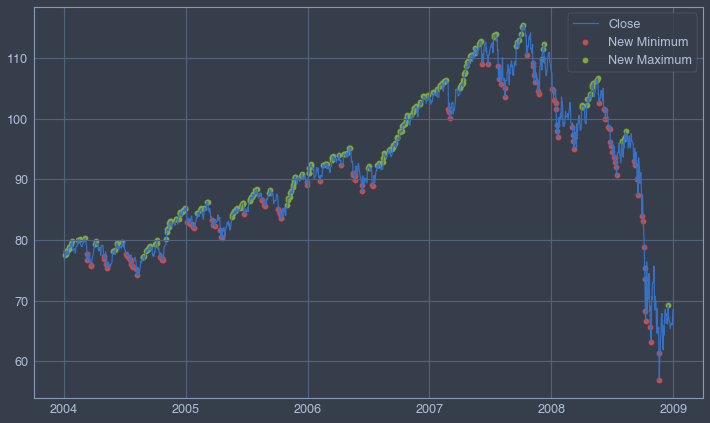

In [15]:
fig, ax = plt.subplots()
ax.plot(spy_close.loc['2004':'2008'].index, spy_close.loc['2004':'2008']['Close'], label='Close')
ax.scatter(spy_close_min.loc['2004':'2008'].index, spy_close_min.loc['2004':'2008']['Close'], label='New Minimum', c='r')
ax.scatter(spy_close_max.loc['2004':'2008'].index, spy_close_max.loc['2004':'2008']['Close'], label='New Maximum', c='g')
ax.grid(True)
plt.legend()

In [16]:
# us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
dr = pd.bdate_range(spy_close.index[50], periods=4, freq='B')[::-1]
dr

DatetimeIndex(['2002-04-17', '2002-04-16', '2002-04-15', '2002-04-12'], dtype='datetime64[ns]', freq='-1B')

In [17]:
row = spy_close.iloc[18]
spy_close.index.get_loc(row.name)

18

In [18]:
idx = spy_close.index.get_loc(spy_close.index[13])
len(spy_close.iloc[idx - 4: idx]['New Minimum'][spy_close.iloc[idx - 4: idx]['New Minimum']])
# spy_close.iloc[idx - 4: idx]['New Minimum']

0

In [20]:
len(spy_close.loc[dr]['New Minimum'][spy_close.loc[dr]['New Minimum']])

1

In [35]:
idx = spy_close.index.get_loc(spy_close.index[69])
l = len(spy_close.iloc[idx - 4: idx]['New Minimum'][spy_close.iloc[idx - 4: idx]['New Minimum']])
if not 0:
    print(1)
else:
    print(0)
l

1


2

In [21]:
spy_position = spy_close.loc['2004':'2008'].copy()
spy_position

,Close,20d_min,20d_max,New Maximum,New Minimum
Date,,,,,
2004-01-02,76.726021,73.275681,76.760483,False,False
2004-01-05,77.560654,73.275681,77.560654,True,False
2004-01-06,77.636543,73.275681,77.636543,True,False
2004-01-07,77.898643,73.275681,77.898643,True,False
2004-01-08,78.209099,73.275681,78.209099,True,False
...,...,...,...,...,...
2008-12-24,65.856522,61.896313,69.261162,False,False
2008-12-26,66.236458,61.896313,69.261162,False,False
2008-12-29,66.046501,61.896313,69.261162,False,False


In [22]:
spy_close.loc['2004-04-08']

Close          79.168526
20d_min         75.76976
20d_max        79.791519
New Maximum        False
New Minimum        False
Name: 2004-04-08 00:00:00, dtype: object

In [23]:
spy_close.loc['2004':'2008']

,Close,20d_min,20d_max,New Maximum,New Minimum
Date,,,,,
2004-01-02,76.726021,73.275681,76.760483,False,False
2004-01-05,77.560654,73.275681,77.560654,True,False
2004-01-06,77.636543,73.275681,77.636543,True,False
2004-01-07,77.898643,73.275681,77.898643,True,False
2004-01-08,78.209099,73.275681,78.209099,True,False
...,...,...,...,...,...
2008-12-24,65.856522,61.896313,69.261162,False,False
2008-12-26,66.236458,61.896313,69.261162,False,False
2008-12-29,66.046501,61.896313,69.261162,False,False


In [42]:
idx = spy_position.index.get_loc(spy_position.index[49])
l = len(spy_position.iloc[idx - 4: idx]['New Minimum'][spy_position.iloc[idx - 4: idx]['New Minimum']])
l

2

In [96]:
prepare = False
prev_min = 0
def turtle_soup(data):
    global prepare
    global prev_min
    if data['New Minimum']:
        idx = spy_position.index.get_loc(data.name)
        l = len(spy_position.iloc[idx - 4: idx]['New Minimum'][spy_position.iloc[idx - 4: idx]['New Minimum']])
        prev_min = spy_position.iloc[idx - 1]['20d_min']
        if not l:
            prepare = True
        
    if data['Close'] < prev_min and prepare:
        prepare = False
        return 1
    return 0
#     if data['New Minimum'] and len(previous_4_days_period_minimums) == 0:
#         if current_price < previous_minimum:
#             prepare = True
#             order_buy_limit = previous_minimum + 5
#             order_stop_loss = current_price - 1
#     if prepare and current_price == order_buy_limit:
#         position = 1
#     if prepare and current_price == order_stop_loss:
#         position = 0
#         prepare = False

In [97]:
spy_position['position'] = spy_position[4:].apply(turtle_soup, axis=1)
spy_position.dropna()

,Close,20d_min,20d_max,New Maximum,New Minimum,position
Date,,,,,,
2004-01-08,78.209099,73.275681,78.209099,True,False,0.0
2004-01-09,77.526176,73.873016,78.209099,False,False,0.0
2004-01-12,78.098701,73.873016,78.209099,False,False,0.0
2004-01-13,77.643425,73.873016,78.209099,False,False,0.0
2004-01-14,78.291824,74.257439,78.291824,True,False,0.0
...,...,...,...,...,...,...
2008-12-24,65.856522,61.896313,69.261162,False,False,0.0
2008-12-26,66.236458,61.896313,69.261162,False,False,0.0
2008-12-29,66.046501,61.896313,69.261162,False,False,0.0


In [99]:
spy_position[spy_position['position'] == 1].count()

Close          39
20d_min        39
20d_max        39
New Maximum    39
New Minimum    39
position       39
dtype: int64

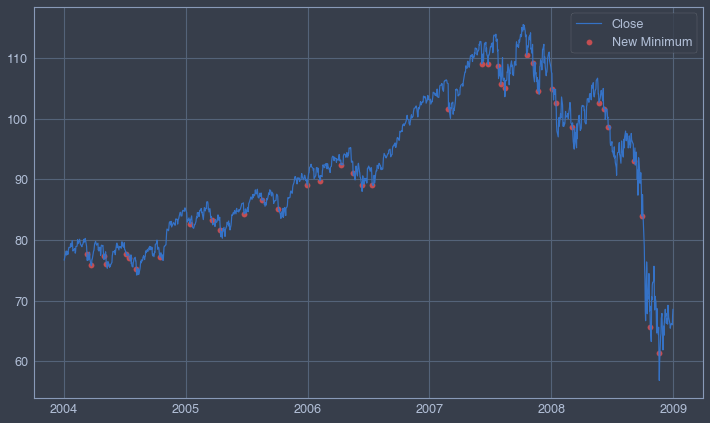

In [100]:
spy_min_position = spy_position[spy_position['position'] == 1]
fig, ax = plt.subplots()
ax.plot(spy_position.index, spy_position['Close'], label='Close')
ax.scatter(spy_min_position.index, spy_min_position['Close'], label='New Minimum', c='r')
ax.grid(True)
plt.legend()